In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from iop_ext import radius_iop
from iop_ext import error_iop
from lf14 import radius_lf14

In [2]:
# import exoplanet masses and radii
exoplanet_data = '/Users/cesaritoortiz/Downloads/ASTR9A/Python 3.13/coding/data/catalog_exoplanets.dat'

list_catalog_rp, list_catalog_mp = np.genfromtxt(exoplanet_data, delimiter="\t",unpack=True, usecols=(1,4), filling_values=0.0)

print("Exoplanet catalog imported successfully!")

Exoplanet catalog imported successfully!


In [22]:
#import Evolution of exoplanets 

Kepler80d_fname = '/Users/cesaritoortiz/Downloads/ASTR9A/Python 3.13/coding/Evolution_Kepler80d.csv'

Kepler_Rp, Kepler_Mp = np.genfromtxt(Kepler80d_fname, delimiter=",",unpack=True, usecols=(2,1), filling_values=0.0)

GJ_fname = '/Users/cesaritoortiz/Downloads/ASTR9A/Python 3.13/coding/Evolution_GJ_1214b.csv'

GJ_Rp, GJ_Mp = np.genfromtxt(GJ_fname, delimiter=",",unpack=True, usecols=(2,1), filling_values=0.0)

TOI_fname = '/Users/cesaritoortiz/Downloads/ASTR9A/Python 3.13/coding/Evolution_TOI_178b.csv'

TOI_Rp, TOI_Mp = np.genfromtxt(TOI_fname, delimiter=",",unpack=True, usecols=(2,1), filling_values=0.0)

In [23]:
#import mass radius models from Li Zeng 2016



#Pure iron planet (core i guess)
list_zeng_fe_m, list_zeng_fe_r = np.loadtxt("/Users/cesaritoortiz/Downloads/ASTR9A/Python 3.13/coding/models/zeng-iron.dat", unpack=True, usecols=(0,1))

#earth well duh
list_zeng_earth_m, list_zeng_earth_r = np.loadtxt("/Users/cesaritoortiz/Downloads/ASTR9A/Python 3.13/coding/models/zeng-earth.dat", unpack=True, usecols=(0,1))

#pure rock planet? what the heck is that
list_zeng_rock_m, list_zeng_rock_r = np.loadtxt("/Users/cesaritoortiz/Downloads/ASTR9A/Python 3.13/coding/models/zeng-rock.dat", unpack=True, usecols=(0,1))

#half water planet nice
list_zeng_50water_m, list_zeng_50water_r = np.loadtxt("/Users/cesaritoortiz/Downloads/ASTR9A/Python 3.13/coding/models/Zeng2016.dat", unpack=True, usecols=(0,3))

print("Mass-radius data curves imported successfully!")

Mass-radius data curves imported successfully!


In [24]:
  # import Artem's model to calculate planet radius based on 4 parameters
cmf = 0.325 #core mass fraction
wmf = 0.5 #water mass fraction
teq = 600 #temperature equilibrium

# Define the mass-radius calculation for the steam atmosphere planet
planet_masses = np.logspace(np.log10(0.1), np.log10(20.0), 1000)

# Now calculate radii for each mass (using radius_iop function)
radii = np.array([radius_iop(cmf, wmf, teq, mp) for mp in planet_masses])

errors = np.array([error_iop(cmf, wmf, teq, mp) for mp in planet_masses])

mask_valid = (errors==0)

#LF14 model

met = 1.0
age = 5.0
fenv = 5.0


# Define the mass-radius calculation for the LF14 atmosphere planet
planet_masses_2 = np.logspace(np.log10(0.1), np.log10(20.0), 1000)

# Now calculate radii for each mass (using radius_iop function)
radii_2 = np.array([radius_lf14(met,age,fenv,teq,mp) for mp in planet_masses_2])


In [25]:
print(mask_valid)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

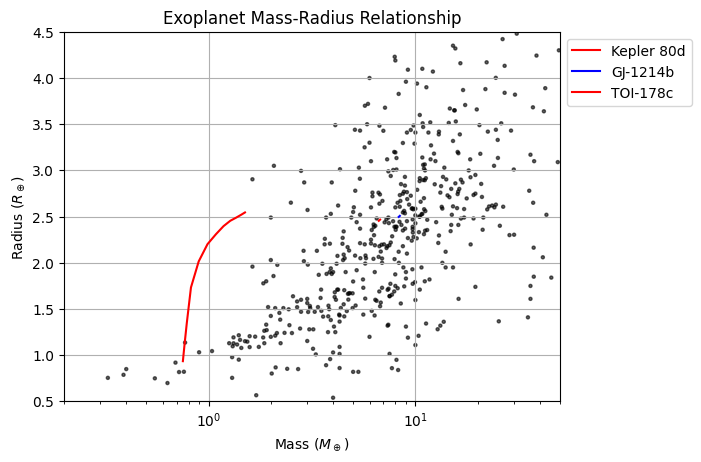

In [27]:
#make the plot YAY!
Mearth = 5.97219e24 #Mass of Earth in KG
Rearth = 6.371e6 #Radius of Earth in m

N_exo = len(list_catalog_mp) #length/number of data values in list_catalog_mp
point_sizes = np.ones(N_exo)*5.0

plt.scatter(list_catalog_mp,list_catalog_rp, color="black", alpha=0.6, sizes=point_sizes) # plot the exoplanets

#plt.plot(list_zeng_fe_m, list_zeng_fe_r, color="gray", linestyle="--", linewidth=2, label="Iron" ) # plot the iron curve

#plt.plot(list_zeng_earth_m, list_zeng_earth_r, color="blue", linestyle="--", linewidth=2, label="Earth") # earth curve

#plt.plot(list_zeng_rock_m, list_zeng_rock_r, color="brown", linestyle="--", linewidth=2, label="Rock") #rock curve

#plt.plot(list_zeng_50water_m, list_zeng_50water_r, color="deepskyblue", linestyle="--", linewidth=2, label="50% Water") # water curve

#plt.plot(planet_masses[mask_valid], radii[mask_valid], label="50% Steam Atmosphere Planet", color='royalblue', linestyle='-') #Artem model curve

#plt.plot(planet_masses_2, radii_2, label=r"5% H$_2$-He LF2014", color='goldenrod', linestyle='-')

plt.plot(Kepler_Mp/Mearth, Kepler_Rp/Rearth, color='red', markersize=5, label='Kepler 80d')
plt.plot(GJ_Mp/Mearth, GJ_Rp/Rearth, color='blue', markersize=5, label='GJ-1214b')
plt.plot(TOI_Mp/Mearth, TOI_Rp/Rearth, color='red', markersize=5, label='TOI-178c')

#figure details
plt.xscale("log") # make the x axis a log scale
plt.xlim(0.2,50) # bound the x axis from 0.2 Earth masses to 50 Earth masses
plt.ylim(0.5,4.5) # bound the y axis 0.5 Earth radii to 4.5 Earth radii
plt.xlabel("Mass ($M_\\oplus$)")
plt.ylabel("Radius ($R_\\oplus$)")
plt.title("Exoplanet Mass-Radius Relationship")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig("2_20_25_Jay's_Exponent_Mass-Radius_Graph.png")
plt.grid(True)
plt.show()